In [1]:
# library for data processing
import pandas as pd
import numpy as np
import openpyxl

# libraries for visualising data
import matplotlib.pyplot as plt
import seaborn as sns

# Other libs
import calendar

# Don't print warnings
import warnings
warnings.filterwarnings('ignore')

### In this project, we will analyse activity data (walks & runs) from a garmin fitness tracker

#### Understanding the data (data fields and explanation)
<ul>
  <li><code>Date_time</code></li>
  <li><code>Activity</code> -- 'Running' or 'Walking'</li>
  <li><code>Time</code> -- (hh:mm:ss) recorded duration of actviity</li>
  <li><code>Moving_time</code> -- (hh:mm:ss) recorded moving time</li>
  <li><code>Elapsed_time</code> -- (hh:mm:ss) amount of time that passes from the start of an activity to its end</li>
  <li><code>Distance</code> -- (km) Distance travelled</li>
  <li><code>Calories</code> -- (kcal) Calories expenditure during activity</li>
  <li><code>Avg_hr</code> -- (BPM) average heart rate in beats per minute</li>
  <li><code>Max_hr</code> -- (BPM) maximum heart rate in beats per minute</li>
  <li><code>Avg_run_cadence</code> -- (SPM) average cadence as strides per minute</li>
  <li><code>Max_run_cadence</code> -- (SPM) Maximum cadence as strides per minute</li>
  <li><code>Avg_pace</code> -- (mm:ss) per km</li>
  <li><code>Best_pace</code> -- (mm:ss) per km</li>
  <li><code>Avg_stride_length</code> -- (meters) average stride length </li>
</ul>

In [2]:
# read the dataframe
df = pd.read_excel('activity_cleaned.xlsx')

# set index to date time 
# df.index = df['Date_time']

# Change date_time column name to date
df.rename(columns={'Date_time': 'Date'}, inplace=True)

# Extract date and remove time
df['Date'] = df['Date'].str.split(' ')
df['Date'] = df['Date'].str[0]

# Change format but keep type
df['Date'] = pd.to_datetime(df['Date'], format='%d/%b/%Y')

In [3]:
df.head(2)

,Date,Activity,Time,Moving_time,Elapsed_time,Distance,Calories,Avg_hr,Max_hr,Avg_run_cadence,Max_run_cadence,Avg_pace,Best_pace,Avg_stride_length
0,2023-05-11,Running,00:19:21,00:19:17,00:22:05,4.17,275,167.0,182.0,168.0,228.0,4:38,3:23,1.29
1,2023-05-11,Running,00:24:00,00:23:59,00:24:00,5.07,338,165.0,181.0,166.0,214.0,4:44,3:47,1.28


#### <span style='color:LightGreen'> **Ex1: Visualise the number recorded walks & number of runs as a bar chart**</span>

In [4]:
# difference between counts of Running and Walking Activity
total_walk_run = df['Activity'].value_counts()

Text(0, 0.5, 'Activity')

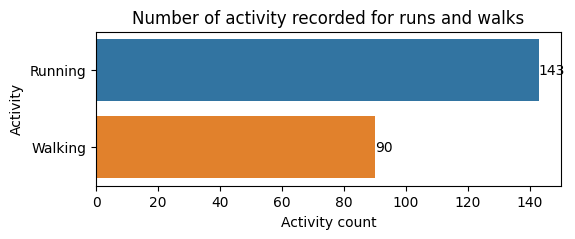

In [5]:
# Get category index labels and values
ex1_index_labels = total_walk_run.index.to_list()
ex1_values = list(total_walk_run.values)

ex1_plot = plt.figure(figsize=(6, 2))
ax = sns.barplot(y=ex1_index_labels, x=ex1_values, orient='h')
ax.bar_label(ax.containers[0])
plt.title('Number of activity recorded for runs and walks')
plt.xlabel('Activity count')
plt.ylabel('Activity')

##### We will now analyse the running and walking data separately

Separate a dataframe for runs and a dataframe for walks

In [6]:
df_walks = df[df['Activity'] == 'Walking']
df_runs = df[df['Activity'] == 'Running']

#### <span style='color:LightGreen'> **Ex2: Visualise the number of days went on walks & runs on a bar chart. Group by months & years**</span>  

Knowing that some days multiple runs/walks are recorded, we want to remove duplicates by date

In [7]:
ex2_df_walks = df_walks.drop_duplicates(subset=['Date'])
ex2_df_runs = df_runs.drop_duplicates(subset=['Date'])
print(f'{len(df_walks) - len(ex2_df_walks)} rows dropped for walks.\nRows remaining for walks: {len(ex2_df_walks)}\n')
print(f'{len(df_runs) - len(ex2_df_runs)} rows dropped for runs.\nRows remaining for runs: {len(ex2_df_runs)}\n')
print(f'Number of activites (summed): {len(ex2_df_walks) + len(ex2_df_runs)}')

9 rows dropped for walks.
Rows remaining for walks: 81

30 rows dropped for runs.
Rows remaining for runs: 113

Number of activites (summed): 194


In [8]:
# Init lists to hold vars
ex2_years_list, ex2_yrs_num_walks, ex2_yr_num_runs = [], [], []
ex2_months_list, ex2_mnths_num_walks, ex2_mnths_num_runs = [], [], []

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# group WALKS by YEAR
ex2_yrs_grp_walks = ex2_df_walks.groupby(ex2_df_walks['Date'].dt.year)

# append values to list
for year, values in ex2_yrs_grp_walks.groups.items():
  ex2_years_list.append(year)
  ex2_yrs_num_walks.append(len(values))

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# group RUNS by YEAR
ex2_yrs_grped_runs = ex2_df_runs.groupby(ex2_df_runs['Date'].dt.year)

# append values to list
for year, values in ex2_yrs_grped_runs.groups.items():
  ex2_yr_num_runs.append(len(values))

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# group WALKS by MONTHS
ex2_mnths_grped_walks = ex2_df_walks.groupby(ex2_df_walks['Date'].dt.month)

# append values to list
for month, values in ex2_mnths_grped_walks.groups.items():
  ex2_months_list.append(month)
  ex2_mnths_num_walks.append(len(values))

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# group RUNS by MONTHS
ex2_mnths_grped_runs = ex2_df_runs.groupby(ex2_df_runs['Date'].dt.month)

# append values to list
for month, values in ex2_mnths_grped_runs.groups.items():
  ex2_mnths_num_runs.append(len(values))

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# create YEARS DF from lists
ex2_years_df = pd.DataFrame({
  'years': ex2_years_list,
  'count_walks_yrs': ex2_yrs_num_walks,
  'count_runs_yrs': ex2_yr_num_runs,
})

# create MONTHS DF from lists
ex2_months_df = pd.DataFrame({
  'months': ex2_months_list,
  'count_walks_mnths': ex2_mnths_num_walks,
  'count_runs_mnths': ex2_mnths_num_runs,
})

ex2_months_df['months'] = [calendar.month_abbr[mnth_int] for mnth_int in ex2_months_df['months']]

Plot bar charts group by years

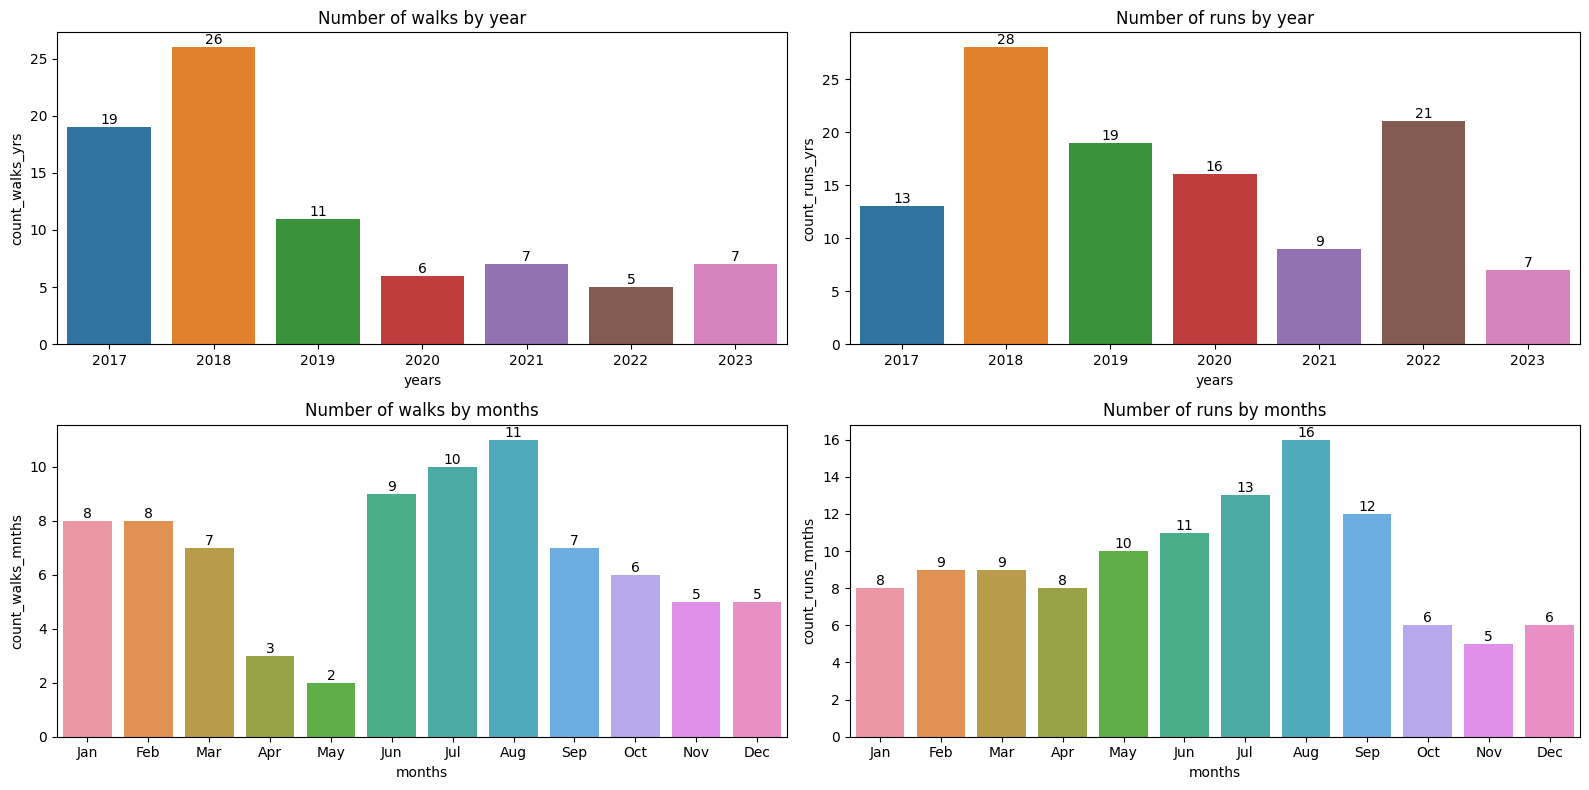

In [9]:
# Plotting bar charts
fig, axes = plt.subplots(2, 2, figsize=(16, 8), sharey=False)

# Plot WALKS - YEAR
sns.barplot(ax=axes[0, 0], data=ex2_years_df, x='years', y='count_walks_yrs')
axes[0, 0].set_title('Number of walks by year')
axes[0, 0].bar_label(axes[0, 0].containers[0])

# Plot RUNS - YEAR
sns.barplot(ax=axes[0, 1], data=ex2_years_df, x='years', y='count_runs_yrs')
axes[0, 1].set_title('Number of runs by year')
axes[0, 1].bar_label(axes[0, 1].containers[0])

# Plot WALKS - YEAR
sns.barplot(ax=axes[1, 0], data=ex2_months_df, x='months', y='count_walks_mnths')
axes[1, 0].set_title('Number of walks by months')
axes[1, 0].bar_label(axes[1, 0].containers[0])

# Plot RUNS - YEAR
sns.barplot(ax=axes[1, 1], data=ex2_months_df, x='months', y='count_runs_mnths')
axes[1, 1].set_title('Number of runs by months')
axes[1, 1].bar_label(axes[1, 1].containers[0])

fig.tight_layout()

## <span style='color:SteelBlue'> **From here we will analyse all running data only**</span>

In [10]:
df_runs = df[df['Activity'] == 'Running']
df_runs.reset_index(drop=True, inplace=True)

# drop 'Moving_time' & 'Elapsed_time' since it's the same as 'Time'
df_runs.drop(columns=['Moving_time', 'Elapsed_time'], inplace=True)

In [11]:
# df_runs.head(2)

Convert create 2 columns. One to store time in minutes and another to store time in hours

In [12]:
df_runs['Time'] = df_runs['Time'].str.split(':')
df_runs['Time_mins'] = df_runs['Time'].apply(lambda x: (int(x[0])*60) + (int(x[1])) + (1 if int(x[2]) > 30 else 0))
df_runs['Time_hrs'] = (df_runs['Time_mins'] / 60)

In [13]:
# df_runs.head(2)

#### <span style='color:LightGreen'> **Get overview of stats**</span>

In [14]:
df_run_stats = df_runs[['Date', 'Time_hrs', 'Distance', 'Calories']]

In [15]:
df_run_stats

,Date,Time_hrs,Distance,Calories
0,2023-05-11,0.316667,4.17,275
1,2023-05-11,0.400000,5.07,338
2,2023-04-30,0.583333,5.73,480
3,2023-04-30,0.850000,10.04,746
4,2023-03-17,0.366667,4.24,327
...,...,...,...,...
138,2017-08-02,0.183333,1.82,121
139,2017-07-26,0.250000,2.21,146
140,2017-07-19,0.266667,2.53,173
141,2017-07-19,0.350000,3.28,223


In [205]:
print(f"Number of recorded runs:    {len(df_run_stats)}")
print(f"Number of days ran :        {len(df_run_stats.drop_duplicates(subset=['Date']))}")
print(f"Total distance ran:         {df_run_stats['Distance'].sum()} KM")
print(f"Total time ran:             {round(df_run_stats['Time_hrs'].sum(), 2)} hrs")
print(f"Total calories expended:    {df_run_stats['Calories'].sum()} Kcal")

Number of recorded runs:    143
Number of days ran :        113
Total distance ran:         916.78 KM
Total time ran:             100.12 hrs
Total calories expended:    67927 Kcal


#### <span style='color:LightGreen'> **Ex3: Visualise the Hours, Distance, Calories of runs on a line chart. Group by years and months**</span>

Create a new df  from selection of relevant columns only

In [17]:
ex3_df = df_runs[['Date', 'Time_hrs', 'Distance', 'Calories']]
# ex3_df.head()

In [18]:
# 2 DFs, grouped by year and months
ex3_grouped_year = ex3_df.groupby(ex3_df['Date'].dt.year)
ex3_grouped_months = ex3_df.groupby(ex3_df['Date'].dt.month)

# Init lists to hold values
ex3_yrs, ex3_yrs_total_hrs, ex3_yrs_total_dist, ex3_yrs_total_cals = [], [], [], []
ex3_mnths, ex3_mnths_total_hrs, ex3_mnths_total_dist, ex3_mnths_total_cals = [], [], [], []

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# LOOP THOUGH AND ...
# Get values for years
for year, index_list in ex3_grouped_year.groups.items():
  ex3_yrs.append(year)
  # pass in list of indexes, get targeted column as series, append summed values to lists
  ex3_yrs_total_hrs.append(ex3_df.iloc[index_list]['Time_hrs'].sum())
  ex3_yrs_total_dist.append(ex3_df.iloc[index_list]['Distance'].sum())
  ex3_yrs_total_cals.append(ex3_df.iloc[index_list]['Calories'].sum())
  
# Get values for months
for month, index_list in ex3_grouped_months.groups.items():
  ex3_mnths.append(month)
  # pass in list of indexes, get targeted column as series, append summed values to lists
  ex3_mnths_total_hrs.append(ex3_df.iloc[index_list]['Time_hrs'].sum())
  ex3_mnths_total_dist.append(ex3_df.iloc[index_list]['Distance'].sum())
  ex3_mnths_total_cals.append(ex3_df.iloc[index_list]['Calories'].sum())

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Create DF for year
ex3_years = pd.DataFrame({
  'years': ex3_yrs,
  'total_hours': ex3_yrs_total_hrs,
  'total_distance': ex3_yrs_total_dist,
  'total_calories': ex3_yrs_total_cals,
})

# Create DF for months
ex3_months = pd.DataFrame({
  'months': ex3_mnths,
  'total_hours': ex3_mnths_total_hrs,
  'total_distance': ex3_mnths_total_dist,
  'total_calories': ex3_mnths_total_cals,
})

ex3_months['months'] = [calendar.month_abbr[mnth_int] for mnth_int in ex3_months['months']]

In [19]:
ex3_years

,years,total_hours,total_distance,total_calories
0,2017,7.416667,49.33,3312
1,2018,19.300000,125.22,11691
2,2019,18.950000,133.51,12274
3,2020,8.900000,88.41,6813
4,2021,7.683333,81.79,5729
5,2022,28.633333,330.45,20638
6,2023,9.233333,108.07,7470


Plot charts

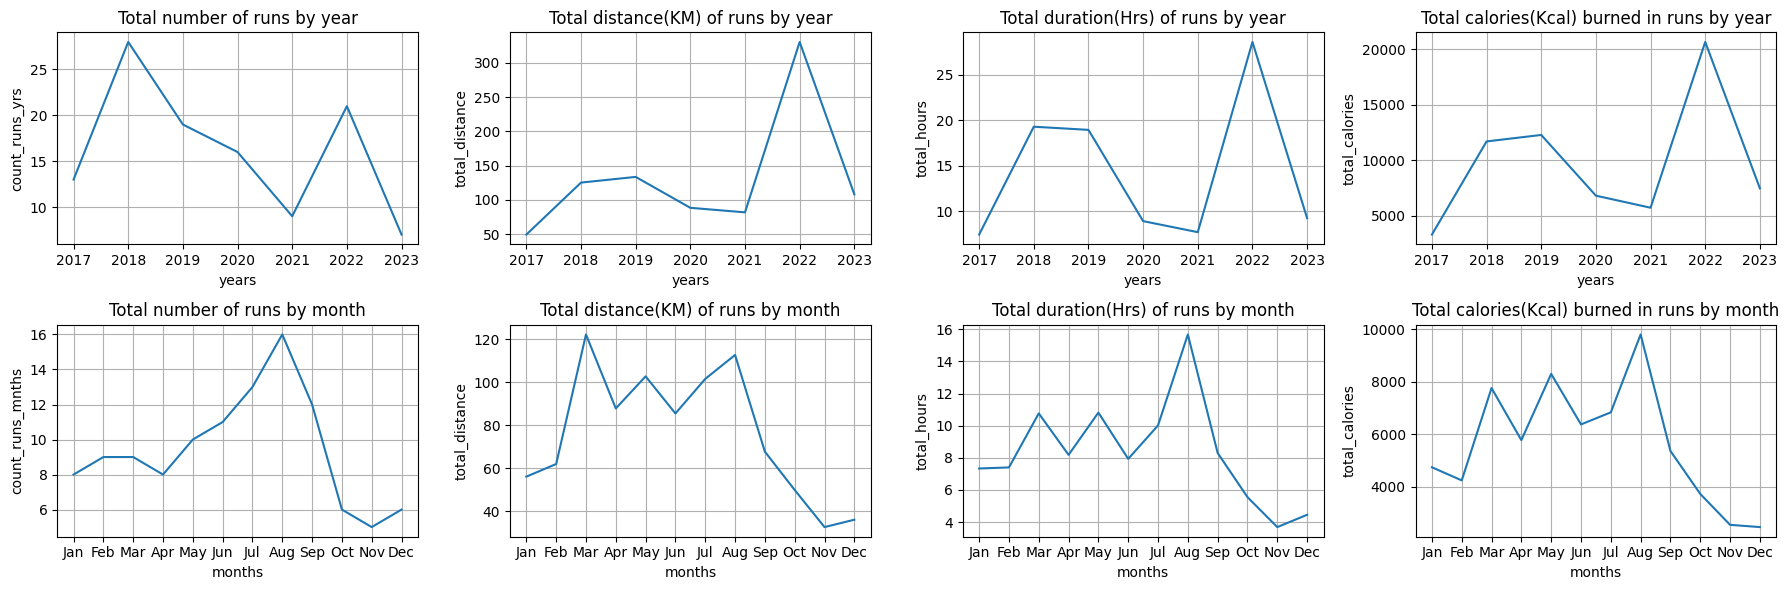

In [20]:
# Plotting line charts
fig, axes = plt.subplots(2, 4, figsize=(18, 6))

# PLOT FIRST ROW ~~~~
# Number of runs 
sns.lineplot(ax=axes[0, 0], data=ex2_years_df, x='years', y='count_runs_yrs')
axes[0, 0].set_title('Total number of runs by year')
# Distance
sns.lineplot(ax=axes[0, 1], data=ex3_years, x='years', y='total_distance')
axes[0, 1].set_title('Total distance(KM) of runs by year')
# Hours
sns.lineplot(ax=axes[0, 2], data=ex3_years, x='years', y='total_hours')
axes[0, 2].set_title('Total duration(Hrs) of runs by year')
# Calories
sns.lineplot(ax=axes[0, 3], data=ex3_years, x='years', y='total_calories')
axes[0, 3].set_title('Total calories(Kcal) burned in runs by year')

# PLOT SECOND ROW ~~~~
# Number of runs 
sns.lineplot(ax=axes[1, 0], data=ex2_months_df, x='months', y='count_runs_mnths')
axes[1, 0].set_title('Total number of runs by month')
# Distance
sns.lineplot(ax=axes[1, 1], data=ex3_months, x='months', y='total_distance')
axes[1, 1].set_title('Total distance(KM) of runs by month')
# Hours
sns.lineplot(ax=axes[1, 2], data=ex3_months, x='months', y='total_hours')
axes[1, 2].set_title('Total duration(Hrs) of runs by month')
# Calories
sns.lineplot(ax=axes[1, 3], data=ex3_months, x='months', y='total_calories')
axes[1, 3].set_title('Total calories(Kcal) burned in runs by month')


# Set grids for all plots
for row in [0, 1]:
  for col in [0, 1, 2, 3]:
    axes[row, col].grid(visible=True, which='both')

fig.tight_layout()

#### <span style='color:LightGreen'> **Ex4: Visualise the Hours, Distance, runs**</span>  
<span style='color:LightGreen'> -Find average hours per run session</span>  
<span style='color:LightGreen'> -Find average distance per run session </span>

In [21]:
ex4_df = df_runs[['Date', 'Time_hrs', 'Distance', 'Calories']]
# ex4_df.head()

In [22]:
# group by 'Date' column so different days will be collapsed into 1
ex4_df_grped = ex4_df.groupby(ex4_df['Date'])

# Init lists to hold values
ex4_date, ex4_hrs, ex4_dist, ex4_cal = [], [], [], []

# loop through and get values for date, distance, calories
for date, index_list in ex4_df_grped.groups.items():
  ex4_date.append(date)
  # pass in list of indexes, get targeted column as series, append summed values to lists
  ex4_hrs.append(ex4_df.iloc[index_list]['Time_hrs'].sum())
  ex4_dist.append(ex4_df.iloc[index_list]['Distance'].sum())
  ex4_cal.append(ex4_df.iloc[index_list]['Calories'].sum())
  
# Create DF 
ex4_df2 = pd.DataFrame({
  'date': ex4_date,
  'hours': ex4_hrs,
  'distance': ex4_dist,
  'calories': ex4_cal,
})

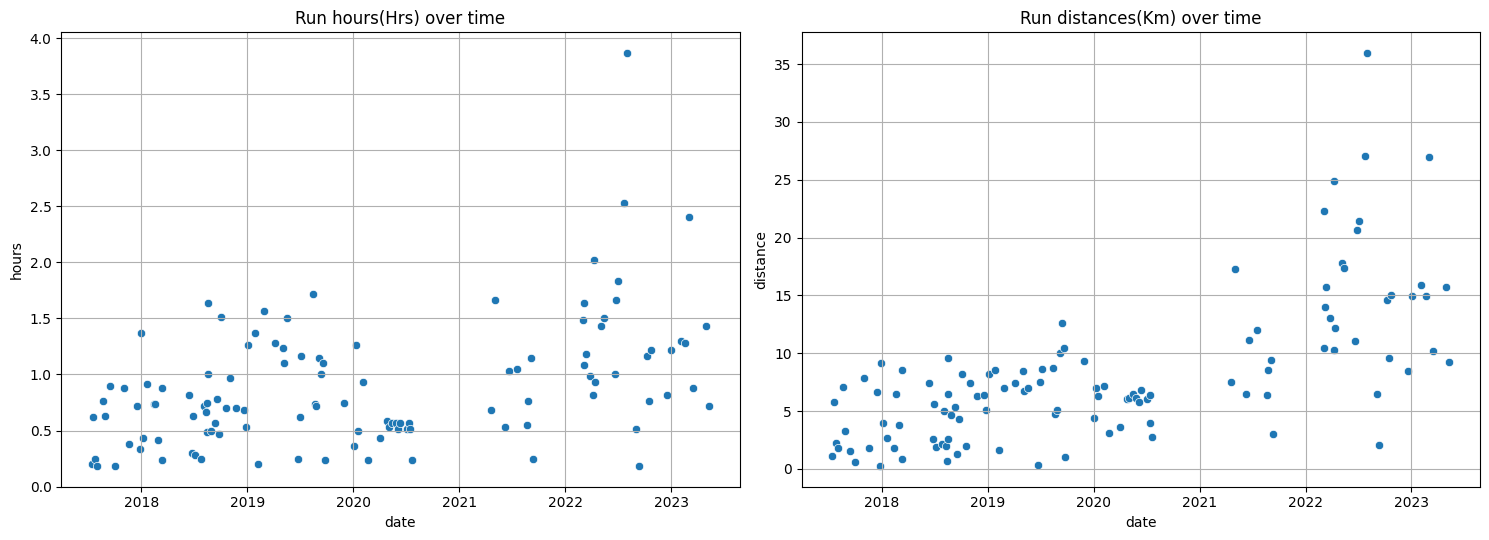

In [23]:
# Plotting line charts
fig, axes = plt.subplots(1, 2, figsize=(15, 5.5) )

# Distance
sns.scatterplot(ax=axes[0], data=ex4_df2, x='date', y='hours')
axes[0].set_title('Run hours(Hrs) over time')
axes[0].grid(visible=True, which='both')

# Hours
sns.scatterplot(ax=axes[1], data=ex4_df2, x='date', y='distance')
axes[1].set_title('Run distances(Km) over time')
axes[1].grid(visible=True, which='both')

fig.tight_layout()

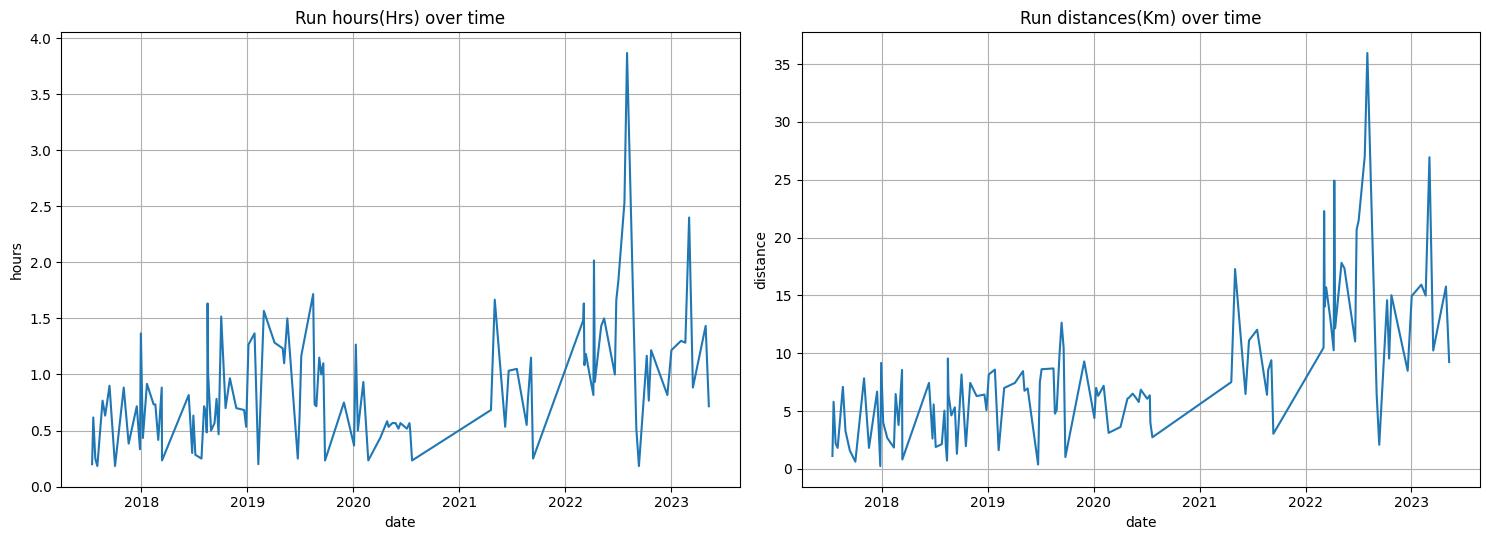

In [24]:
# Plot line plots
# Plotting line charts
fig, axes = plt.subplots(1, 2, figsize=(15, 5.5) )

# Distance
sns.lineplot(ax=axes[0], data=ex4_df2, x='date', y='hours')
axes[0].set_title('Run hours(Hrs) over time')
axes[0].grid(visible=True, which='both')

# Hours
sns.lineplot(ax=axes[1], data=ex4_df2, x='date', y='distance')
axes[1].set_title('Run distances(Km) over time')
axes[1].grid(visible=True, which='both')

fig.tight_layout()

#### <span style='color:LightGreen'> **Ex5: Visualise relationships between variables (Distance, Time, calories)**</span>

<span style='color:LightGreen'>-Plot distance(Km) vs time(Hrs)</span>  
<span style='color:LightGreen'>-Plot distance(Km) vs calories(Kcal)</span>  
<span style='color:LightGreen'>-Plot time(Hrs) vs calories(Kcal)</span>

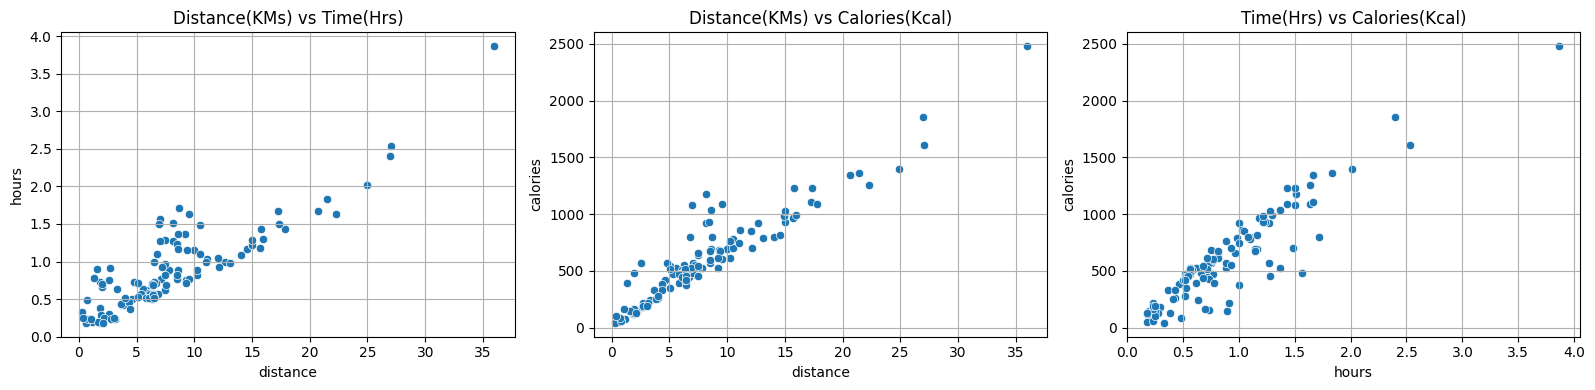

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

sns.scatterplot(ax=axes[0], data=ex4_df2, x='distance', y='hours')
axes[0].set_title('Distance(KMs) vs Time(Hrs)')
axes[0].grid(visible=True, which='both')

sns.scatterplot(ax=axes[1], data=ex4_df2, x='distance', y='calories')
axes[1].set_title('Distance(KMs) vs Calories(Kcal)')
axes[1].grid(visible=True, which='both')

sns.scatterplot(ax=axes[2], data=ex4_df2, x='hours', y='calories')
axes[2].set_title('Time(Hrs) vs Calories(Kcal)')
axes[2].grid(visible=True, which='both')

fig.tight_layout()

#### <span style='color:LightGreen'> **Ex5: Visualise the distribution of all variables using histograms**</span>

In [26]:
# select rows where run at least 1km
ex5_df = df_runs[df_runs['Distance'] >= 1]
ex5_df.reset_index(drop=True, inplace=True)

# drop unused columns
ex5_df.drop(columns=['Date', 'Activity', 'Time'], inplace=True)

In [27]:
# Move column positions
time_hrs = ex5_df.pop('Time_hrs')
ex5_df.insert(0, 'Time_hrs', time_hrs, False)

time_mins = ex5_df.pop('Time_mins')
ex5_df.insert(0, 'Time_mins', time_mins, False)

In [28]:
# Convert pace vars to minutes
ex5_df['Avg_pace'] = ex5_df['Avg_pace'].str.split(':')
ex5_df['Avg_pace'] = ex5_df['Avg_pace'].apply(lambda x: float(x[0]) + (int(x[1])/60))

ex5_df['Best_pace'] = ex5_df['Best_pace'].str.split(':')
ex5_df['Best_pace'] = ex5_df['Best_pace'].apply(lambda x: float(x[0]) + (int(x[1])/60))

In [29]:
ex5_df.head(1)

,Time_mins,Time_hrs,Distance,Calories,Avg_hr,Max_hr,Avg_run_cadence,Max_run_cadence,Avg_pace,Best_pace,Avg_stride_length
0,19,0.316667,4.17,275,167.0,182.0,168.0,228.0,4.633333,3.383333,1.29


In [30]:
# Get a list of all column variable names
column_names = ex5_df.columns.to_list()

For each var, what we want to do is to select the column and non-null values and then plot a histogram

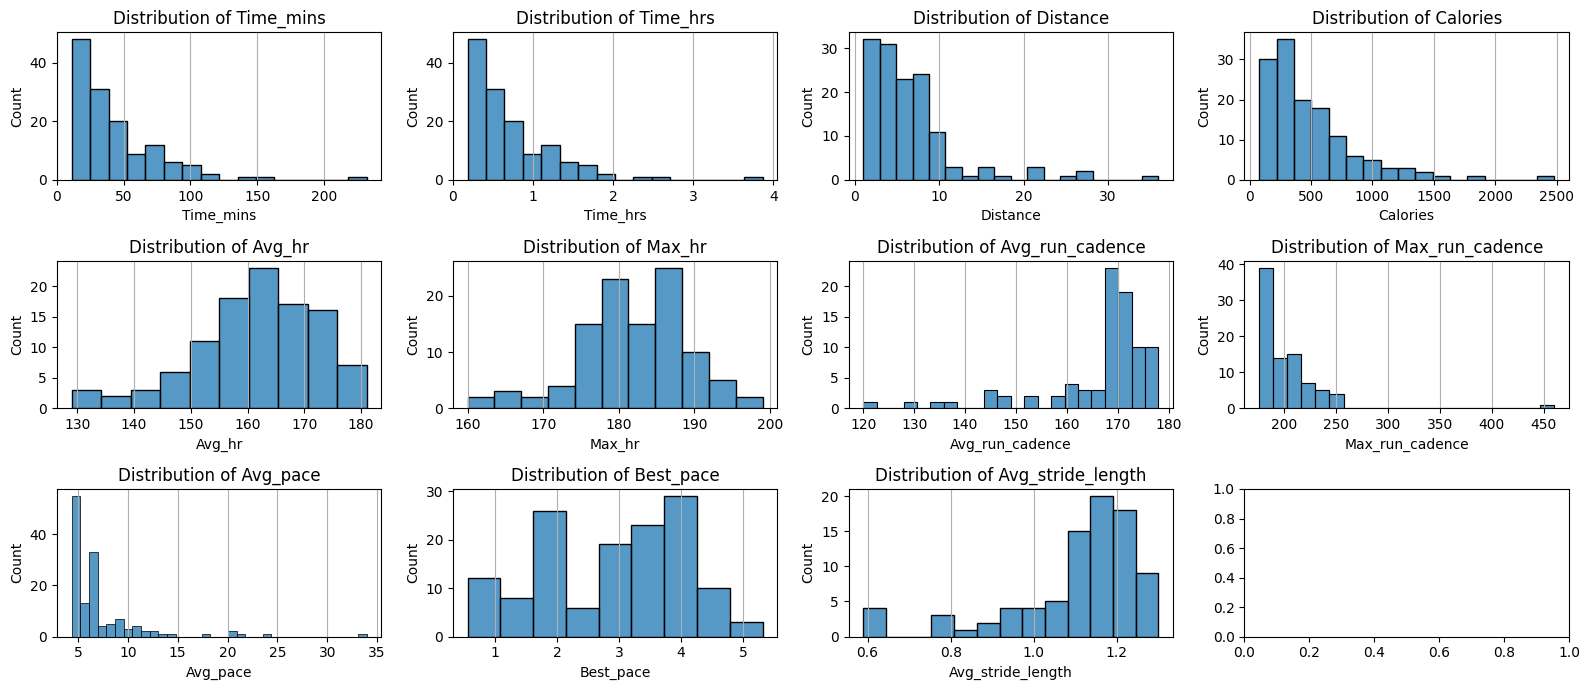

In [31]:
# create a figure
fig, axes = plt.subplots(3, 4, figsize=(16, 7))

# create a counter to loop through columns name list
index_col_name = 0

for row_num in range(3):
  for col_num in range(4):
    try:
      # select column name using the index
      column_name = column_names[index_col_name] 
        
      # select the data column (on non null values)
      data_to_use = ex5_df[column_name].dropna()

      sns.histplot(ax=axes[row_num, col_num], data=data_to_use)
      axes[row_num, col_num].set_title(f'Distribution of {column_name}')
      axes[row_num, col_num].grid(visible=True, which='both', axis='x')
        
      index_col_name += 1
    except:
      pass
        
fig.tight_layout()

#### <span style='color:LightGreen'> **Ex6: Plot heatmap of correlations (Dropping all variables without Avg_pace, Best_pace, Avg_stride_length)**</span>

In [32]:
# select rows where run at least 1km
ex6_df = df_runs[df_runs['Distance'] >= 1]
ex6_df.reset_index(drop=True, inplace=True)

# drop 'Time'
ex6_df.drop(columns=['Activity', 'Time'], inplace=True)

In [33]:
ex6_df.head()

,Date,Distance,Calories,Avg_hr,Max_hr,Avg_run_cadence,Max_run_cadence,Avg_pace,Best_pace,Avg_stride_length,Time_mins,Time_hrs
0,2023-05-11,4.17,275,167.0,182.0,168.0,228.0,4:38,3:23,1.29,19,0.316667
1,2023-05-11,5.07,338,165.0,181.0,166.0,214.0,4:44,3:47,1.28,24,0.400000
2,2023-04-30,5.73,480,166.0,185.0,160.0,176.0,6:07,4:25,1.01,35,0.583333
3,2023-04-30,10.04,746,170.0,181.0,166.0,178.0,5:06,3:57,1.18,51,0.850000
4,2023-03-17,4.24,327,173.0,181.0,168.0,178.0,5:12,4:26,1.14,22,0.366667


Visualise distribution of distances

In [34]:
#print(f"Num null values for 'Avg_hr': { len(ex6_df[ex6_df['Avg_hr'].isna()]) }")
#print(f"Num null values for 'Avg_run_cadence': { len(ex6_df[ex6_df['Avg_run_cadence'].isna()]) }")
#print(f"Num null values for 'Avg_pace': { len(ex6_df[ex6_df['Avg_pace'].isna()]) }")
#print(f"Num null values for 'Avg_stride_length': { len(ex6_df[ex6_df['Avg_stride_length'].isna()]) }")

For pace vars: 0 null columns  
For HR vars: 30 null columns  
For cadence vars & Avg_stride_length: 51 null columns

Select rows where there is HR data, pace data, avg_stride_length data is NOT NULL

In [35]:
ex6_df = ex6_df[(ex6_df['Avg_hr'].isnull() == False) & (ex6_df['Avg_pace'].isnull() == False) & (ex6_df['Avg_stride_length'].isnull() == False)]
print(f"Rows dropped: {len(ex6_df) - len(ex6_df)}")
print(f"Rows remaining: {len(ex6_df)}")

Rows dropped: 0
Rows remaining: 85


Convert pace vars to minutes

In [36]:
ex6_df['Avg_pace'] = ex6_df['Avg_pace'].str.split(':')
ex6_df['Avg_pace'] = ex6_df['Avg_pace'].apply(lambda x: float(x[0]) + (int(x[1])/60))

ex6_df['Best_pace'] = ex6_df['Best_pace'].str.split(':')
ex6_df['Best_pace'] = ex6_df['Best_pace'].apply(lambda x: float(x[0]) + (int(x[1])/60))

In [37]:
ex6_df.drop(columns=['Date'], inplace=True)
ex6_df.head()

,Distance,Calories,Avg_hr,Max_hr,Avg_run_cadence,Max_run_cadence,Avg_pace,Best_pace,Avg_stride_length,Time_mins,Time_hrs
0,4.17,275,167.0,182.0,168.0,228.0,4.633333,3.383333,1.29,19,0.316667
1,5.07,338,165.0,181.0,166.0,214.0,4.733333,3.783333,1.28,24,0.400000
2,5.73,480,166.0,185.0,160.0,176.0,6.116667,4.416667,1.01,35,0.583333
3,10.04,746,170.0,181.0,166.0,178.0,5.100000,3.950000,1.18,51,0.850000
4,4.24,327,173.0,181.0,168.0,178.0,5.200000,4.433333,1.14,22,0.366667


We generate a correlation matrix for all features using '.corr()'. We round all values to 2dp

In [38]:
ex6_corr_matrix = round(ex6_df.corr(), 2)

# Creating a mask for the upper triangle as we only want values below the diagonal
mask = np.triu(np.ones_like(ex6_corr_matrix))

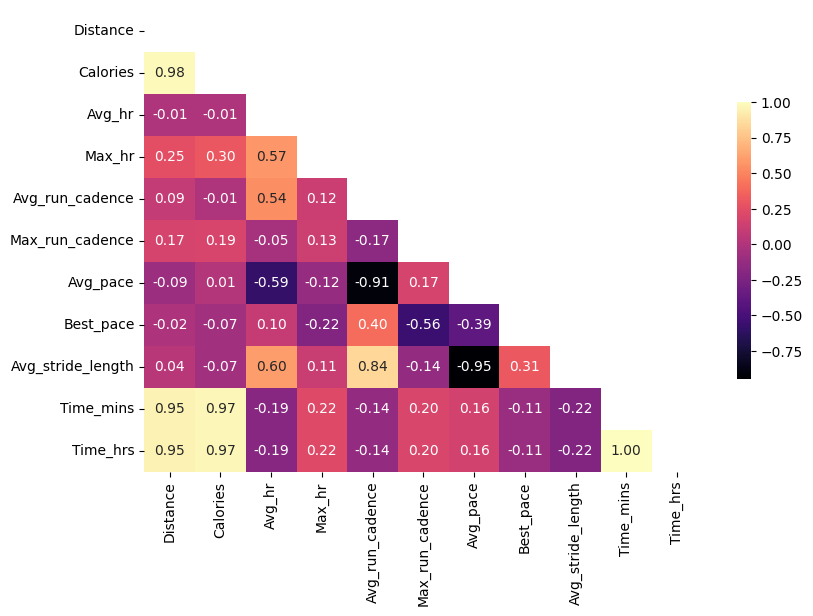

In [39]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(ex6_corr_matrix, cmap='magma', annot=True, fmt=".2f", mask=mask, cbar_kws={"shrink": .6})
plt.show()

#### <span style='color:LightGreen'> **Ex7: Create scatter plots of interesting relationships.**</span>

<ul style='color:LightGreen'>
    <li>Max heart rate & calories</li>
    <li>Max heart rate & distance</li>
    <li>Avg run cadence & distance</li>
    <li>Avg run cadence & average heart rate</li>
    <li>Avg pace & average heart rate</li>
    <li>Avg pace & average heart rate</li>
    <li>Avg stride length & average heart rate</li>
    <li>Avg stride length & average run cadence</li>
    <li>Avg stride length & best pace</li>
</ul>

In [40]:
# reuse df from last ex
ex7_df = ex6_df.copy()

In [41]:
# Init a list var to hold all relationships
relationships = ['Max_hr & Calories',    'Max_hr & Distance',        'Avg_run_cadence & Distance',           'Avg_run_cadence & Avg_hr',
 'Avg_pace & Avg_hr',                    'Avg_pace & Avg_hr',        'Avg_stride_length & Avg_hr',           'Avg_stride_length & Avg_run_cadence',     'Avg_stride_length & Best_pace']

# create a units dict 
units = {
  'Max_hr': 'Beats per min',
  'Avg_hr': 'Beats per min',
  'Calories': 'Kcal',
  'Distance': 'Km',
  'Avg_run_cadence': r'Strides/min',
  'Avg_pace': r'mins/km',
  'Best_pace': r'mins/km',
  'Avg_stride_length': 'meters',
}

In [42]:
# define a function that splits the input text then returns the name of var 1 and var 2
def get_names_var1_and_var2(input_txt):
  return input_txt.split(' & ')[0], input_txt.split(' & ')[1]

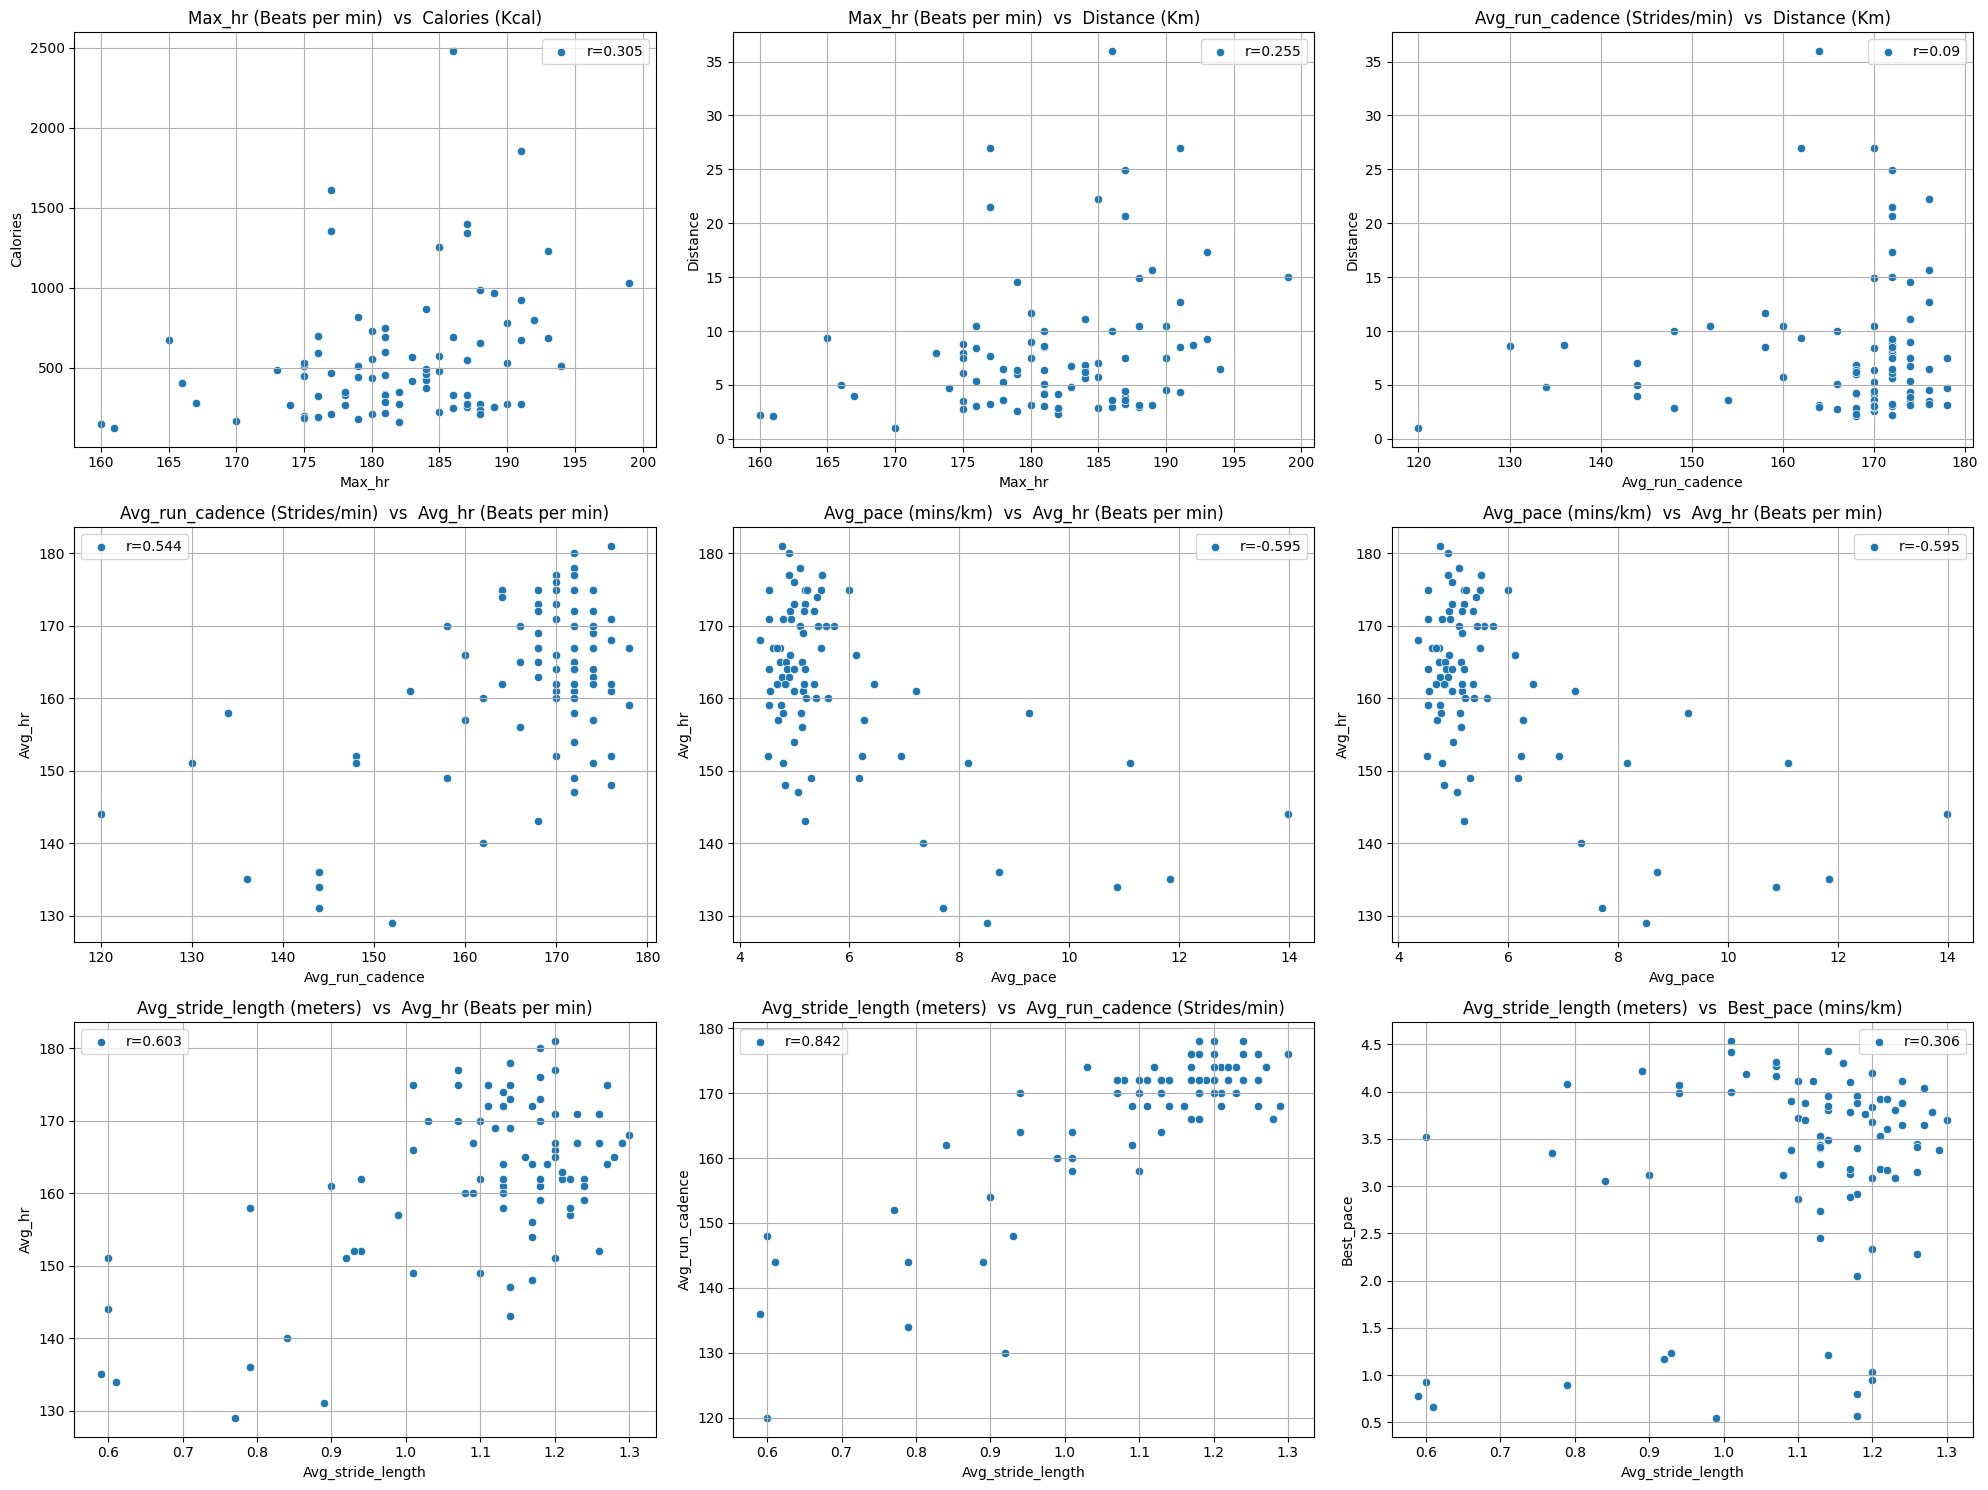

In [43]:
# Create a correlation matrix (to get r score)
correlation_matrix = ex7_df.corr()

# plot graphs
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

i = 0

for row in range(3):
  for col in range(3):
    
    # use counter (i) varto loop into relationships list and get names for var 1 and 2
    var1_name, var2_name = get_names_var1_and_var2(relationships[i])
    
    # get Pearson Correlation Coefficient
    r_val = correlation_matrix.loc[var1_name, var2_name]

    # create a scatter plot, set title and set grid
    sns.scatterplot(ax=axes[row, col], data=ex7_df, x=var1_name, y=var2_name)
    # for title, iterate into the units dict to get units
    axes[row, col].set_title(f'{var1_name} ({units[var1_name]})  vs  {var2_name} ({units[var2_name]})')
    axes[row, col].grid(visible=True, which='both')
    axes[row, col].legend([f'r={round(r_val, 3)}'])

    # increase counter var
    i += 1

fig.tight_layout()

#### <span style='color:LightGreen'> **Ex8: Estimate the time taken to run a marathon and calories that will be expended.**</span>

In [44]:
# select runs above 1km and on selected fields only
ex8_df = df_runs[df_runs['Distance'] >= 1][['Time_hrs', 'Distance', 'Calories']]

In [71]:
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [46]:
# calculate regression
reg_dist_time = linregress(x=ex8_df['Distance'], y=ex8_df['Time_hrs'], alternative='two-sided')
reg_dist_cals = linregress(x=ex8_df['Distance'], y=ex8_df['Calories'], alternative='two-sided')

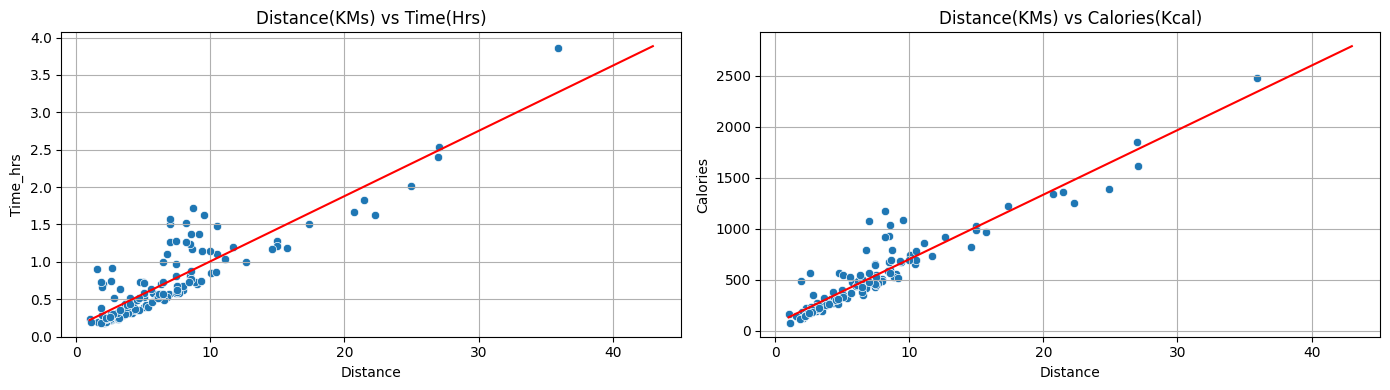

In [119]:
# reg graphs
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# create reg line for line range to plot
line_range = pd.Series([val for val in range(1, 44)])

# plot for distance x time
sns.scatterplot(ax=axes[0], data=ex8_df, x='Distance', y='Time_hrs')
axes[0].set_title('Distance(KMs) vs Time(Hrs)')
axes[0].plot(line_range, reg_dist_time.intercept + reg_dist_time.slope*line_range, color='red', label = 'reg line: 1km to 43km')
axes[0].grid(visible=True, which='both')

# plot for distance x time
sns.scatterplot(ax=axes[1], data=ex8_df, x='Distance', y='Calories')
axes[1].set_title('Distance(KMs) vs Calories(Kcal)')
axes[1].plot(line_range, reg_dist_cals.intercept + reg_dist_cals.slope*line_range, color='red', label = 'reg line: 1km to 43km')
axes[1].grid(visible=True, which='both')

fig.tight_layout()

In [93]:
# reshape distance
reshape_dist = np.array(ex8_df['Distance']).reshape(-1, 1)

In [86]:
# create model to predict time
model_time = LinearRegression()
# reshape distance from 1D to 2D array
model_time.fit(reshape_dist, ex8_df['Time_hrs'])

# create model to predict calories
model_cal = LinearRegression()
model_cal.fit(reshape_dist, ex8_df['Calories'])

LinearRegression()

In [87]:
# use double brackets for a 2d array
pred_time = model_time.predict([[42.2]])[0]
print(f"{round(pred_time, 1)} hours")

pred_cals = model_cal.predict([[42.2]])[0]
print(f"{round(pred_cals)} calories")

3.8 hours
2742 calories


Looking at the scatterplot for both, a linear model seems to be fitting to predict calories based on distance. 

However, for the time, a linear model does not seem to be accurate. 

In [68]:
ex8_df[ex8_df['Distance']>35]

,Time_hrs,Distance,Calories
19,3.866667,35.96,2480


The model predicts a run of 42.2km to take 3.8 hours and this is unlikely to be accurate as the previous run of 36km already took 3.86 hours.

We need polynominal model as a curve is likely to fit the data better than a linear line.

In [194]:
# init degrees val
degrees_val = 3

# generate a polynominal
poly = PolynomialFeatures(degree=degrees_val, include_bias=False)

# fit transform the x axis values (distance)
x_poly = poly.fit_transform(reshape_dist)

# create a model & fit fit x and y values (distance and time)
poly_model = LinearRegression()
poly_model.fit(x_poly, ex8_df['Time_hrs'])

LinearRegression()

Resources  
Fitting and plotting polynominal  
https://www.youtube.com/watch?v=H8kocPOT5v0

Fixing issues with plot  
https://stackoverflow.com/questions/63927400/too-many-lines-and-curves-on-the-polynomial-graph

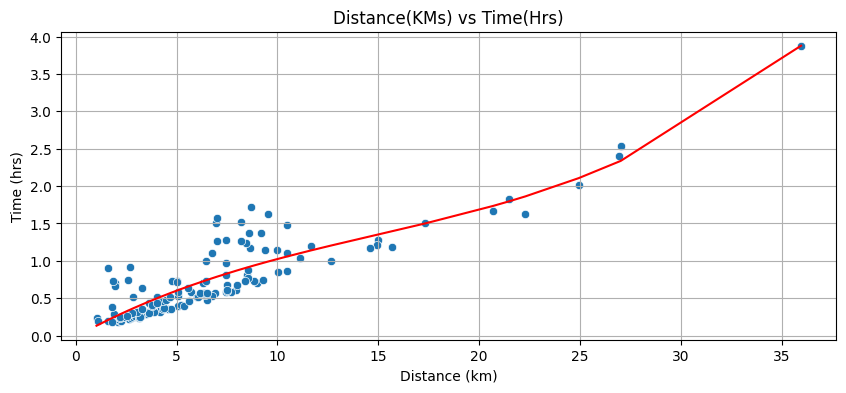

In [195]:
# create figure for distance x time and scatterplot
fig, ax = plt.subplots(figsize=(10, 4))
sns.scatterplot(data=ex8_df, x='Distance', y='Time_hrs')

# create predicted y vals
y_vals = poly_model.predict(x_poly)

# use this to solve issue of too many lines
orders = np.argsort(reshape_dist.ravel())

# plot line
ax.plot(reshape_dist[orders], y_vals[orders], color='r')
ax.set_title('Distance(KMs) vs Time(Hrs)')
plt.xlabel('Distance (km)')
plt.ylabel('Time (hrs)')
ax.grid(visible=True, which='both')

In [196]:
# Predicting a new result with Polynomial Regression
# after converting predict variable to 2D array
val = 42.2
to_array = np.array([[val]])
pred_time = poly_model.predict(poly.fit_transform(to_array))[0]
print(f"{round(pred_time, 1)} hours")

5.7 hours


Visualising extended graph

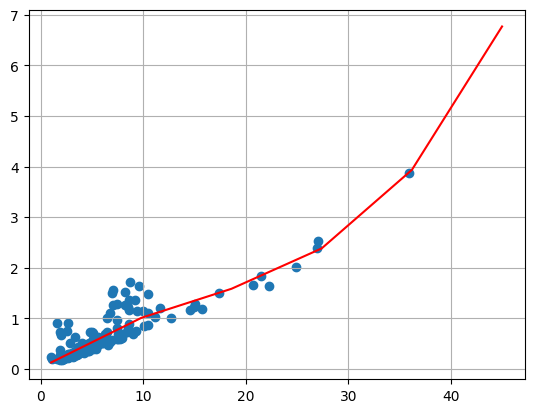

In [202]:
model = np.poly1d(np.polyfit(ex8_df['Distance'], ex8_df['Time_hrs'], degrees_val))
polyline = np.linspace(1, 45, 6)
plt.scatter(ex8_df['Distance'], ex8_df['Time_hrs'])
plt.plot(polyline, model(polyline), color='red')
plt.grid(visible=True, which='both')